In [89]:
import pandas as pd

filename = "WA_Fn-UseC_-Telco-Customer-Churn.train.csv"
telco_data = pd.read_csv(filename)

# Prima Analisi dei dati

In [90]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [91]:
# describes categorical data
telco_object_data = telco_data.select_dtypes(exclude=['number'])
telco_object_data.describe()

,Churn,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5300
top,No,1591-NFNLQ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,4138,1,2887,2904,3951,5082,2685,2481,2810,2448,2489,2791,2239,2223,3083,3325,1887,10


In [92]:
# describes numerical data
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


Stranamente `TotalCharges` non viene indicato come numerico...

In [93]:
telco_data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


Probabilmente il campo `customerID` non serve per allenare il modello. Quindi lo si può spostare come indice

In [94]:
telco_data.index = telco_data['customerID']
telco_data = telco_data.drop(labels=['customerID'], axis=1)
telco_data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,No,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
6035-RIIOM,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
3797-VTIDR,Yes,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
2568-BRGYX,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [95]:
import seaborn as sns

Sembra che all'aumentare del valore di `tenure` il cliente accetti anche addebiti mensili più alti rispetto a chi ha mollato la compagnia con la stessa tariffa

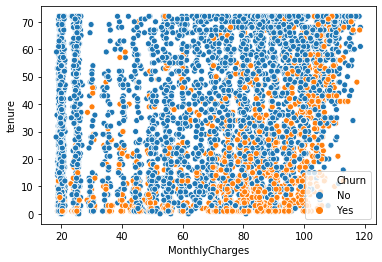

In [96]:
sns.scatterplot(x="MonthlyCharges", y="tenure", hue="Churn",

                     data=telco_data)
# tenure indica da quanto tempo il cliente è fornito dalla compagnia (?)

In [97]:
total_charges_numeric = pd.to_numeric(telco_data["TotalCharges"], errors='coerce')
print("Number of missing total charges: ", total_charges_numeric.isna().sum())

Number of missing total charges:  10


Si fa una conversione di formato per il campo `TotalCharges` in modo tale da rappresentare correttamente anche i valori `NaN`. Informazione che era "nascosta" per via del tipo stringa precedentemente utilizzato

In [98]:
telco_data_raw = telco_data
telco_data_raw["TotalCharges"] = total_charges_numeric
telco_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4223-BKEOR to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null 

# Creazione degli insiemi di train e di test

In [147]:
from sklearn.model_selection import train_test_split

X = telco_data_raw.drop(labels=['Churn'], axis=1)
y = telco_data_raw.Churn
y = y.map({"Yes": 1, "No": 0}) #non servono encoder particolari, quindi applico direttamente la conversione
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

# Pulizia dei dati

A questo punto occorre trasformare tutti i valori categorici in valori numerici e i valori nulli si possono riempire facendo una stima

In [148]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [149]:
telco_object_data = X.select_dtypes(exclude=['number'])
categorical_cols = telco_object_data.columns
numerical_cols = X.select_dtypes(include=['number']).columns

print("There are", len(categorical_cols), "categorical columns", end=" ")
print("\nThose columns are", categorical_cols, end=" ")
print("\n")
print("\nThere are", len(numerical_cols), "numerical columns", end=" ")
print("\nThose columns are", numerical_cols, end=" ")



There are 15 categorical columns 
Those columns are Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object') 


There are 4 numerical columns 
Those columns are Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') 

In [151]:
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

for col in categorical_cols:
    X_train_clean[col] = encoder.fit_transform(X_train_clean[col])
    X_test_clean[col] = encoder.transform(X_test_clean[col])
 


from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

#train
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean))
X_train_imputed.columns = X_train_clean.columns
X_train_imputed.index = X_train_clean.index

#valid

#test
X_test_imputed = pd.DataFrame(imputer.transform(X_test_clean))
X_test_imputed.columns = X_test_clean.columns
X_test_imputed.index = X_test_clean.index

X_train_clean = X_train_imputed
X_test_clean = X_test_imputed

X_train_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
1374-DMZUI,0.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,94.30,424.45
4942-VZZOM,1.0,0.0,1.0,0.0,64.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,66.15,4392.50
6169-PGNCD,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,74.30,4166.35
2604-XVDAM,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.80,540.95
5961-VUSRV,0.0,0.0,0.0,0.0,12.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,19.35,219.35


# Training del modello

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

depths = [3,4,5,10, None]
criterions = ['gini', 'entropy']
min_samples = [1, 5, 20, 50, 100]
max_nodes = [20, 50, 100, 300, None]

from itertools import product
parameters = product(depths, criterions, min_samples, max_nodes)

scores = []
for parameter in parameters:
    depth, criterion, min_sample, max_node = parameter
    model = DecisionTreeClassifier(criterion=criterion, max_depth = depth, min_samples_leaf = min_sample, max_leaf_nodes = max_node, random_state=33)
    scores.append( [depth, criterion, min_sample, max_node, cross_val_score(estimator=model, X=X_train_clean, y=y_train, cv=5, n_jobs=4).mean()] )


[[3, 'gini', 1, 20, 0.7730208612751046],
 [3, 'gini', 1, 50, 0.7730208612751046],
 [3, 'gini', 1, 100, 0.7730208612751046],
 [3, 'gini', 1, 300, 0.7730208612751046],
 [3, 'gini', 1, None, 0.7730208612751046],
 [3, 'gini', 5, 20, 0.7734648124404764],
 [3, 'gini', 5, 50, 0.7734648124404764],
 [3, 'gini', 5, 100, 0.7734648124404764],
 [3, 'gini', 5, 300, 0.7734648124404764],
 [3, 'gini', 5, None, 0.7734648124404764],
 [3, 'gini', 20, 20, 0.7734648124404764],
 [3, 'gini', 20, 50, 0.7734648124404764],
 [3, 'gini', 20, 100, 0.7734648124404764],
 [3, 'gini', 20, 300, 0.7734648124404764],
 [3, 'gini', 20, None, 0.7734648124404764],
 [3, 'gini', 50, 20, 0.7734648124404764],
 [3, 'gini', 50, 50, 0.7734648124404764],
 [3, 'gini', 50, 100, 0.7734648124404764],
 [3, 'gini', 50, 300, 0.7734648124404764],
 [3, 'gini', 50, None, 0.7734648124404764],
 [3, 'gini', 100, 20, 0.7734648124404764],
 [3, 'gini', 100, 50, 0.7734648124404764],
 [3, 'gini', 100, 100, 0.7734648124404764],
 [3, 'gini', 100, 300, 0

# Analisi parametri
Si conlcude l'analsi del modello, scegliendo quali parametri tendono a massimizzare il valore di score

In [243]:
scores_data = pd.DataFrame(scores, 
                           columns=['max_depth', 'criterion', 'min_samples_leaf', 'max_leaf_nodes', 'score'],
                          )
scores_data = scores_data.fillna(value=500)
scores_data

,max_depth,criterion,min_samples_leaf,max_leaf_nodes,score
0,3.0,gini,1,20.0,0.773021
1,3.0,gini,1,50.0,0.773021
2,3.0,gini,1,100.0,0.773021
3,3.0,gini,1,300.0,0.773021
4,3.0,gini,1,500.0,0.773021
...,...,...,...,...,...
245,500.0,entropy,100,20.0,0.790548
246,500.0,entropy,100,50.0,0.791880
247,500.0,entropy,100,100.0,0.791880
248,500.0,entropy,100,300.0,0.791880


Si individua un massimo in`max_depth`= 5

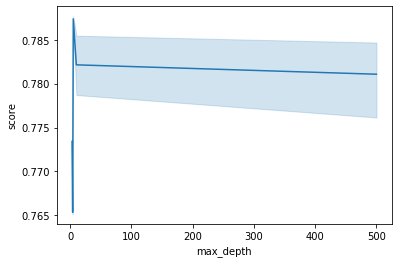

In [244]:
sns.lineplot(x="max_depth", y="score", data=scores_data)

Il criterio migliore sembra `gini`, anche se la differenza è minima.

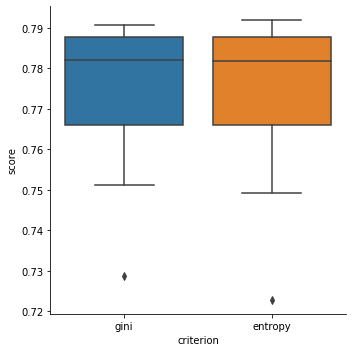

In [227]:
sns.catplot(x="criterion", y="score", kind="box", data=scores_data);

La funzione sembra crescente all'aumentare di `min_samples_leaf'

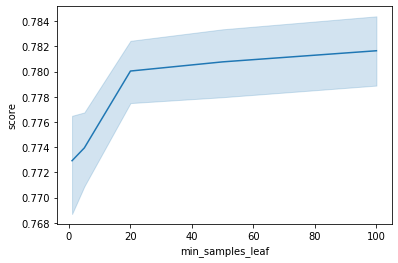

In [229]:
sns.lineplot(x="min_samples_leaf", y="score", data=scores_data)

La funzione sembra decrescere in base al valore di `max_leaf_nodes`

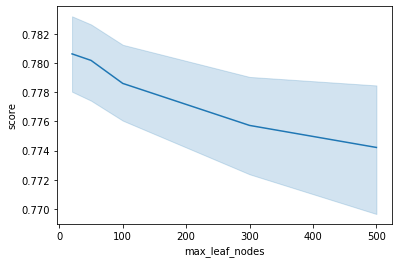

In [245]:
sns.lineplot(x="max_leaf_nodes", y="score", data=scores_data)


Dall'analisi dei parametri si intuisce che il miglior modello sarà definito dalle seguenti scelte

In [224]:
final_model = DecisionTreeClassifier(
                    criterion='gini', 
                    max_depth = 5, 
                    min_samples_leaf = 100, 
                    max_leaf_nodes = 20, 
                    random_state=33
              )
final_model.fit(X_train_clean, y_train)
final_model.score(X_test_clean, y_test)

0.7861579414374446